Laden Sie den Datensatz
‚herford_weather.csv‘ . Er entstammt der
Open Meteo Api und enthält
We erdaten zur Loka on Herford.
a)
 Formen Sie den Datensatz in eine
Zeitreihe um, indem Sie den
Zeitstempel in einen Date Time –
Datentyp dtype('<M8[ns]‘)
umformen und als Index setzen.
Erzeugen Sie den folgenden
DataFrame (mind. Ansicht der
ersten 5 Zeilen und Spalten ) und
zeichnen Sie ein Liniendiagramm
für die Temperaturwerte in 2m
über dem Boden  (1)

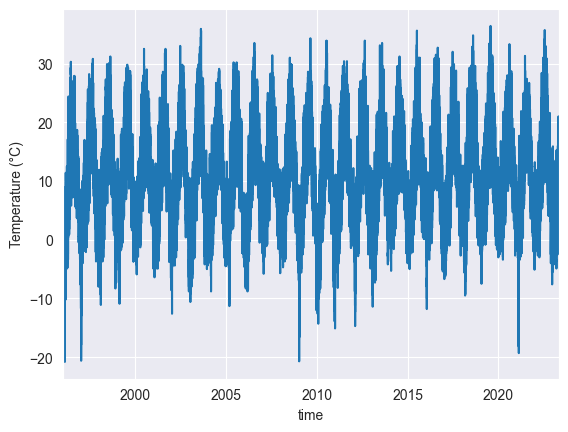

In [232]:
import datetime
from math import trunc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("herford_weather.csv")

df["time"] = pd.to_datetime(df["time"])         #time zu datatype datetime ändern

df = df.set_index("time")                       #index zu time ändern

df["temperature_2m (°C)"].plot()                #plotten
plt.xlabel("time")
plt.ylabel("Temperature (°C)")
plt.show()


b) Erzeugen Sie einen
Datensatz, der nur die
täglichen Mitelwerte für
2022 enthält (Abb oben) und
stellen Sie wieder die
Temperatur in 2 m
Bodenhöhe einmal für
stündliche Werte (links) und
einmal für die täglichen
Mitelwerte(rechts) dar.

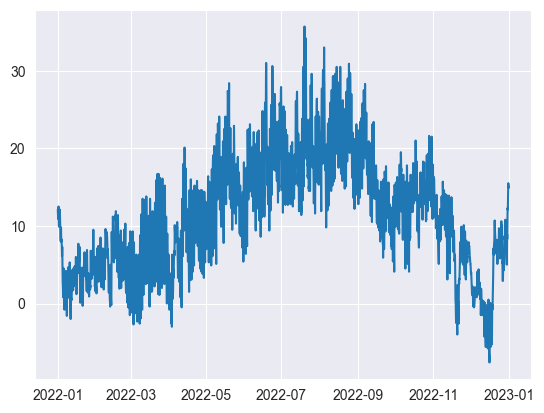

In [233]:
# --- B ---
df_2022 = df[df.index.year == 2022]             #df_2022 bildet nur 2022 ab

plt.plot(df_2022["temperature_2m (°C)"])        #plotten

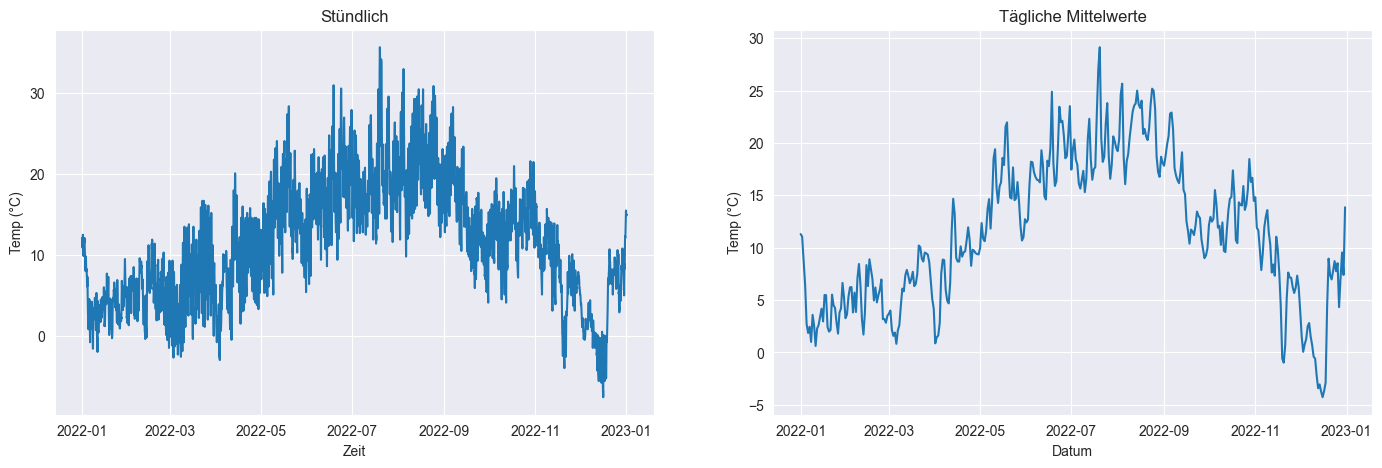

In [234]:

plt.figure(figsize=(17,5))                      # Gesamtgröße für zwei Plots
plt.subplot(1,2,1)                              #pos 1 2 1
plt.plot(df_2022["temperature_2m (°C)"])
plt.title("Stündlich")
plt.xlabel("Zeit")
plt.ylabel("Temp (°C)")

#rechte figure
df_daily_2022 = df_2022.resample("D").mean()         # Tagesmittel

plt.subplot(1,2,2)                              # Plot 2 (rechts)
plt.plot(df_daily_2022["temperature_2m (°C)"])
plt.title("Tägliche Mittelwerte")
plt.xlabel("Datum")
plt.ylabel("Temp (°C)")

#plt.tight_layout()                  # verhindert Überlappungen
plt.show()


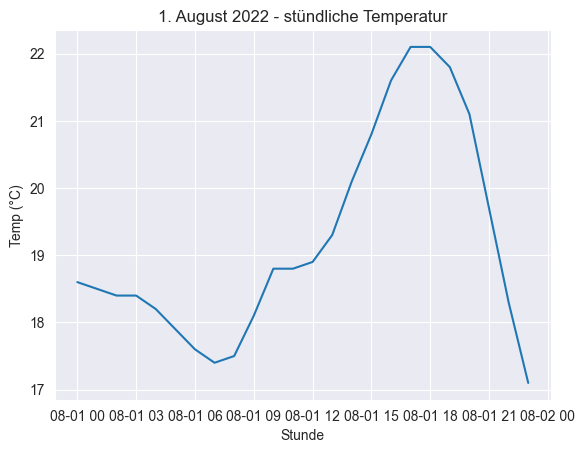

In [235]:
# 2 --- A ---
aug_1_2022 = datetime.datetime(2022,8,1)                            # date zum vergleichen erstellen

constrained_hourly = df_2022.loc[aug_1_2022.strftime("%Y-%m-%d")]   # 2) Stundenwerte vom Original nehmen

plt.plot(constrained_hourly["temperature_2m (°C)"])

#plt.xticks(ticks=range(24), labels=range(24))
plt.xlabel("Stunde")

plt.ylabel("Temp (°C)")
plt.title("1. August 2022 - stündliche Temperatur")
plt.show()

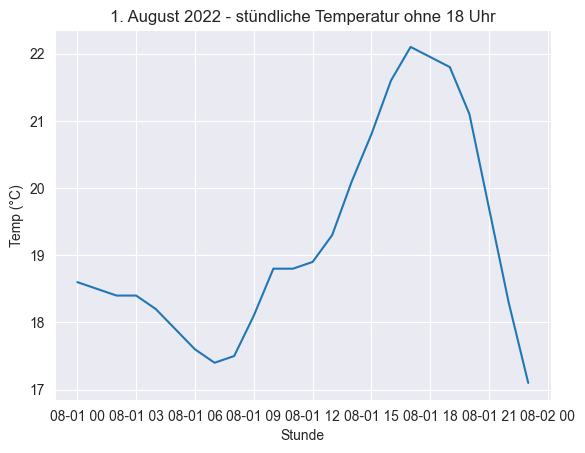

In [236]:
# 1) 1. August 2022 stündlich auswählen
aug_1_2022 = "2022-08-01"
constrained_hourly = df_2022.loc[aug_1_2022]

# 2) 18 Uhr entfernen
constrained_hourly_without18 = constrained_hourly[constrained_hourly.index.hour != 18]

plt.plot(constrained_hourly_without18["temperature_2m (°C)"])

plt.xlabel("Stunde")
plt.ylabel("Temp (°C)")
plt.title("1. August 2022 - stündliche Temperatur ohne 18 Uhr")
plt.grid(True)
plt.show()